In [1]:
#import custom classes from decision tree
from decisiontree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Classification Tree from Scratch

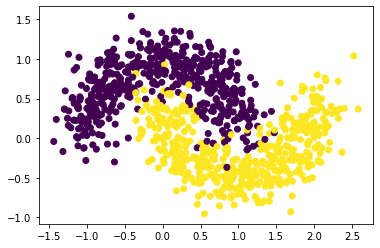

In [2]:
N= 1000
X,Y = make_moons(N, noise=0.2)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_1 <= threshold: 0.1994 , info_gain: 0.2399
 left:X_0 <= threshold: -0.4558 , info_gain: 0.1047
  left:0
  right:X_1 <= threshold: -0.149 , info_gain: 0.0122
    left:X_0 <= threshold: 0.8476 , info_gain: 0.0001
        left:1
        right:1
    right:X_0 <= threshold: 1.474 , info_gain: 0.032
        left:1
        right:1
 right:X_0 <= threshold: 1.4363 , info_gain: 0.1197
  left:X_1 <= threshold: 0.488 , info_gain: 0.0315
    left:X_0 <= threshold: 0.4502 , info_gain: 0.0942
        left:0
        right:0
    right:X_1 <= threshold: 0.6085 , info_gain: 0.0018
        left:0
        right:0
  right:1


In [4]:
#test
Y_pred = classifier.predict(X_test) 
print(f"Our implementation of tree from scratch reaches an accuracy of {accuracy_score(Y_test, Y_pred)*100}%")

Our implementation of tree from scratch reaches an accuracy of 92.5%


### Comparison with sklearn

In [16]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree

In [18]:
tree_sklearn = dtc(min_samples_split=3, max_depth=5)
d_C = tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has an accuracy of {accuracy_score(Y_test, y_hat)*100}%")

With the same parameters, sklearn implementation has an accuracy of 94.5%


[Text(154.84500000000003, 199.32, 'X[1] <= 0.201\ngini = 0.5\nsamples = 800\nvalue = [402, 398]'),
 Text(66.96000000000001, 163.07999999999998, 'X[0] <= -0.373\ngini = 0.214\nsamples = 362\nvalue = [44, 318]'),
 Text(50.220000000000006, 126.83999999999999, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(83.70000000000002, 126.83999999999999, 'X[1] <= -0.149\ngini = 0.116\nsamples = 339\nvalue = [21, 318]'),
 Text(50.220000000000006, 90.6, 'X[0] <= 0.851\ngini = 0.009\nsamples = 220\nvalue = [1, 219]'),
 Text(33.480000000000004, 54.359999999999985, 'X[0] <= 0.84\ngini = 0.022\nsamples = 92\nvalue = [1, 91]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 91\nvalue = [0, 91]'),
 Text(50.220000000000006, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 128\nvalue = [0, 128]'),
 Text(117.18, 90.6, 'X[0] <= 1.476\ngini = 0.28\nsamples = 119\nvalue = [20, 99]'),
 Text(100.44000000000

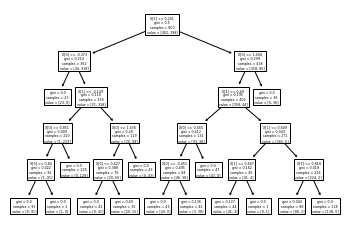

In [19]:
tree.plot_tree(d_C)

# Regression Tree from Scratch

In [7]:
data = load_diabetes()
x = data.data
y = data.target
y = y.reshape(-1,1)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=41)

In [9]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=5)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_2 <= threshold: 0.0089 , info_gain: 1750.351
 left:X_8 <= threshold: -0.0109 , info_gain: 845.2897
  left:X_5 <= threshold: 0.1089 , info_gain: 197.0922
    left:X_2 <= threshold: -0.0105 , info_gain: 88.3194
        left:X_6 <= threshold: 0.0229 , info_gain: 72.231
                left:71
                right:72
        right:X_8 <= threshold: -0.0236 , info_gain: 457.3024
                left:81
                right:155
    right:253
  right:X_6 <= threshold: -0.025 , info_gain: 509.1624
    left:X_9 <= threshold: 0.0486 , info_gain: 511.7687
        left:X_8 <= threshold: 0.0178 , info_gain: 419.7274
                left:91
                right:292
        right:X_5 <= threshold: 0.0316 , info_gain: 4779.3375
                left:262
                right:120
    right:X_0 <= threshold: 0.0417 , info_gain: 356.093
        left:X_5 <= threshold: -0.0217 , info_gain: 722.037
                left:86
                right:109
        right:X_2 <= threshold: 0.0013 , info_gain: 852.

In [10]:
y_hat = regressor.predict(X_test)
print(f"Our implementation of tree from scratch reaches a MSE of {mean_squared_error(Y_test, y_hat)}")


Our implementation of tree from scratch reaches a MSE of 5861.820224719101


### Comparison with sklearn

In [20]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeRegressor as dtr

In [21]:
tree_sklearn = dtr(min_samples_split=3, max_depth=5)
d_R = tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has a MSE of {mean_squared_error(Y_test, y_hat)}")

With the same parameters, sklearn implementation has a MSE of 0.044845244217740596


[Text(154.84500000000003, 199.32, 'X[1] <= 0.201\nmse = 0.25\nsamples = 800\nvalue = 0.498'),
 Text(66.96000000000001, 163.07999999999998, 'X[0] <= -0.373\nmse = 0.107\nsamples = 362\nvalue = 0.878'),
 Text(50.220000000000006, 126.83999999999999, 'mse = 0.0\nsamples = 23\nvalue = 0.0'),
 Text(83.70000000000002, 126.83999999999999, 'X[1] <= -0.149\nmse = 0.058\nsamples = 339\nvalue = 0.938'),
 Text(50.220000000000006, 90.6, 'X[0] <= 0.851\nmse = 0.005\nsamples = 220\nvalue = 0.995'),
 Text(33.480000000000004, 54.359999999999985, 'X[0] <= 0.84\nmse = 0.011\nsamples = 92\nvalue = 0.989'),
 Text(16.740000000000002, 18.119999999999976, 'mse = 0.0\nsamples = 91\nvalue = 1.0'),
 Text(50.220000000000006, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(66.96000000000001, 54.359999999999985, 'mse = 0.0\nsamples = 128\nvalue = 1.0'),
 Text(117.18, 90.6, 'X[0] <= 1.476\nmse = 0.14\nsamples = 119\nvalue = 0.832'),
 Text(100.44000000000001, 54.359999999999985, 'X[0] <= 0.427\nmse =

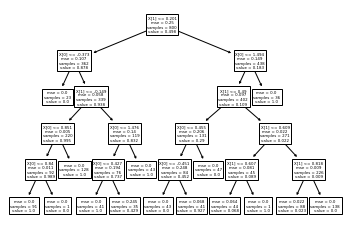

In [22]:
tree.plot_tree(d_R)